In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income_by_age = pd.read_csv('clean_data/loan_data.csv')
income_by_age.head()

,Unnamed: 0,age,median_income,mean_income,2004LB,2005LB,2006LB,2007LB,2008LB,2009LB,2010LB,2011LB,2012LB,2013LB,2014LB,age_group
0,0,18,5000.0,8419.92,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
1,1,19,10000.0,13484.63,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
2,2,20,14438.0,17456.99,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
3,3,21,18000.0,21927.80,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
4,4,22,18501.0,23680.10,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0


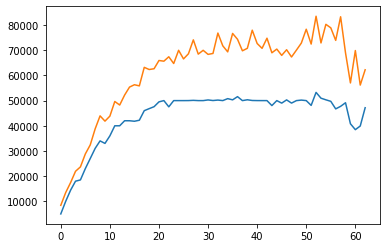

In [4]:
_ = plt.plot(income_by_age[['median_income', 'mean_income']])
plt.show()

In [5]:
borrowers = pd.read_csv('clean_data/borrowers_2014.csv')
borrowers.head()

,Unnamed: 0,NumberOfBorrowers,minBal,maxBal,percentage
0,0,9028800,NaN,5000.0,0.208310
1,1,7785500,5001.0,10000.0,0.179625
2,2,12348000,10001.0,25000.0,0.284890
3,3,7997000,25001.0,50000.0,0.184505
4,4,3126800,50001.0,75000.0,0.072141


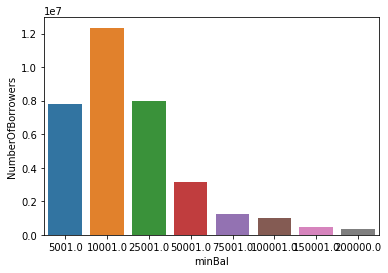

In [10]:
_ = sns.barplot(y='NumberOfBorrowers', x='minBal', data=borrowers)
plt.show()

In [46]:
ocup_data = pd.read_csv('clean_data/ocup_data.csv')
ocup_data.head()

,ocupation,gender,2010,2011,2012,2013,2015,2014,2016,2017,income_type
0,Accommodation and food services,Female,20867,21190,21276,21737,22392,21932,23076,24328,Median earnings (dollars)
1,Accommodation and food services,Male,25350,25388,25572,25900,26785,26422,28026,29530,Median earnings (dollars)
2,Administrative and support and waste managemen...,Female,29972,30211,30359,30407,30626,30402,31279,31870,Median earnings (dollars)
3,Administrative and support and waste managemen...,Male,32226,32121,32376,32144,33653,32417,34709,36582,Median earnings (dollars)
4,"Agriculture, forestry, fishing and hunting",Female,24020,24889,23657,23017,25302,23854,25860,26551,Median earnings (dollars)


In [47]:
ocup_data = ocup_data.set_index(['ocupation', 'gender'])
ocup_data.head()


2010   2011  \
ocupation                                          gender                 
Accommodation and food services                    Female  20867  21190   
                                                   Male    25350  25388   
Administrative and support and waste management... Female  29972  30211   
                                                   Male    32226  32121   
Agriculture, forestry, fishing and hunting         Female  24020  24889   

                                                            2012   2013  \
ocupation                                          gender                 
Accommodation and food services                    Female  21276  21737   
                                                   Male    25572  25900   
Administrative and support and waste management... Female  30359  30407   
                                                   Male    32376  32144   
Agriculture, forestry, fishing and hunting         Female  23657  23017   

                                                            2015   2014  \
ocupation                                          gender                 
Accommodation and food services                    Female  22392  21932   
                                                   Male    26785  26422   
Administrative and support and waste management... Female  30626  30402   
                                                   Male    33653  32417   
Agriculture, forestry, fishing and hunting         Female  25302  23854   

                                                            2016   2017  \
ocupation                                          gender                 
Accommodation and food services                    Female  23076  24328   
                                                   Male    28026  29530   
Administrative and support and waste management... Female  31279  31870   
                                                   Male    34709  36582   
Agriculture, forestry, fishing and hunting         Female  25860  26551   

                                                                         income_type  
ocupation                                          gender                             
Accommodation and food services                    Female  Median earnings (dollars)  
                                                   Male    Median earnings (dollars)  
Administrative and support and waste management... Female  Median earnings (dollars)  
                                                   Male    Median earnings (dollars)  
Agriculture, forestry, fishing and hunting         Female  Median earnings (dollars)

In [54]:
data = ocup_data.pivot(index='2010', columns='gender', values='2014')
data.head()

KeyError: 'gender'

In [38]:
female = ocup_data[ocup_data.gender == 'Female']
male = ocup_data[ocup_data.gender == 'Male']
data = pd.DataFrame()
data['female'] = female['2014']
data['male'] = male['2014']

#_ = sns.scatterplot(x=male['2014'], y=female['2014'])
#plt.show()

,female,male
0,21932,NaN
2,30402,NaN
4,23854,NaN
6,32539,NaN
8,40370,NaN
